In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Set routing algorithm sub-folders
# experiment_sets=["ASP", "ASPugal"]
experiment_sets=["ECMP_ASP", "UGAL"]
# experiment_sets=["ASP", "ASP_5x", "ASP_ugal", "ASP_ugal_5x"]
_data={}

# Set the path to the folder containing the CSV files
for exp_set in experiment_sets:
    folder_path="./"+exp_set
    exp_data=pd.DataFrame(columns=['link_bw', 'nlat', 'fini_time'])
    AVE_LATs={}
    FINI_TIMEs={}

    import re
    for file_path in glob.glob(os.path.join(folder_path, 'statistics_*.csv')):
        # Define a regular expression pattern to find the last number next to "GBps"
        pattern = re.compile(r'(\d+)GBps')
        match = pattern.search(file_path)
        # Check if a match is found
        assert(match)
        # Extract and print the last number next to "GBps"
        bw = int(match.group(1))

        df = pd.read_csv(file_path)
        fini_time=df[" SimTime"].max()/1E3

        filtered_df = df[(df[' StatisticName'] == ' network_latency') ]
        filtered_df = filtered_df.drop_duplicates(keep = 'first')
        AVE_LAT = filtered_df[' Sum.u64'].sum()/filtered_df[' Count.u64'].sum()

        exp_data = pd.concat([exp_data, pd.DataFrame([{
            'link_bw': bw,
            'nlat': AVE_LAT,
            'fini_time': fini_time
        }])], ignore_index=True)

    _data[exp_set]=exp_data

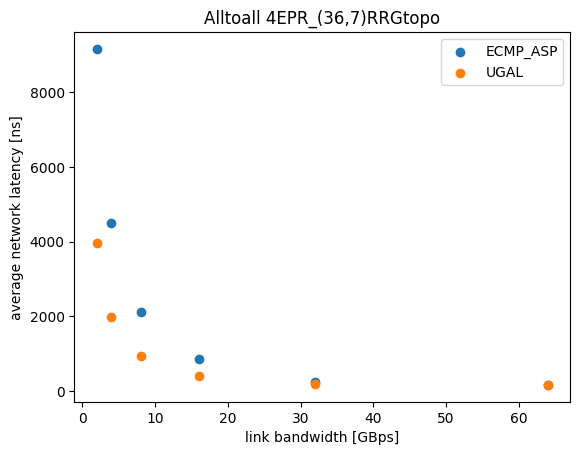

In [3]:
fig, ax = plt.subplots()
for exp_name, exp_data in _data.items():
    ax.scatter(exp_data['link_bw'], exp_data['nlat'], label=exp_name)

ax.set_xlabel("link bandwidth [GBps]")
ax.set_ylabel("average network latency [ns]")
ax.set_title("Alltoall 4EPR_(36,7)RRGtopo")
ax.legend()

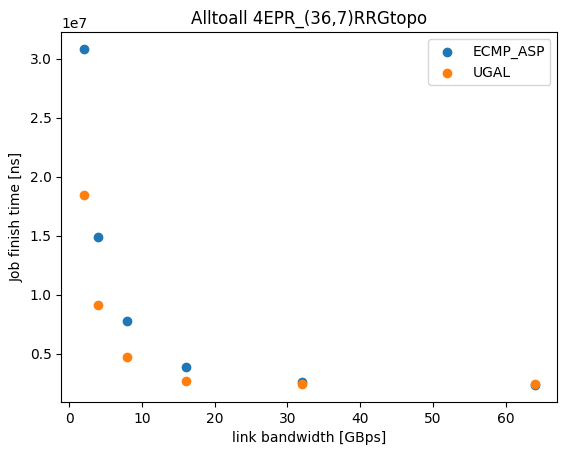

In [4]:
fig, ax = plt.subplots()
for exp_name, exp_data in _data.items():
    ax.scatter(exp_data['link_bw'], exp_data['fini_time'], label=exp_name)

ax.set_xlabel("link bandwidth [GBps]")
ax.set_ylabel("Job finish time [ns]")
ax.set_title("Alltoall 4EPR_(36,7)RRGtopo")
# ax.set_ylim([0, 6E5])
ax.legend()

In [6]:
_data

{'ECMP_ASP':   link_bw         nlat     fini_time
 0      64   163.065021  2.352652e+06
 1       2  9155.302819  3.082568e+07
 2       4  4485.880318  1.488361e+07
 3       8  2104.857396  7.782146e+06
 4      16   850.252292  3.892013e+06
 5      32   252.947182  2.588892e+06,
 'UGAL':   link_bw         nlat    fini_time
 0       2  3961.577655  18466125.00
 1      32   193.218420   2419344.50
 2       4  1970.350702   9150335.00
 3      64   163.668402   2430332.75
 4      16   404.281481   2716770.50
 5       8   931.484357   4703016.00}

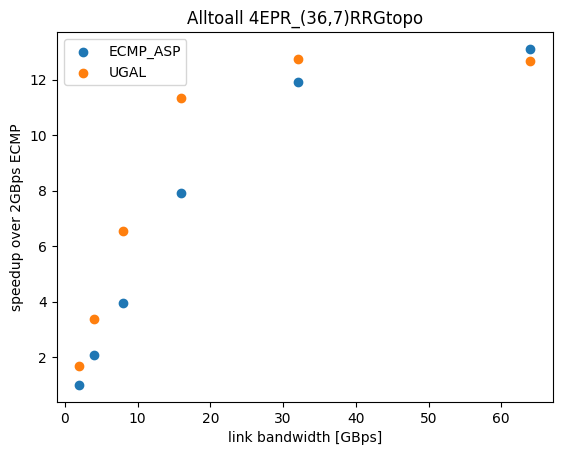

In [5]:
fig, ax = plt.subplots()
baseline=_data["ECMP_ASP"][_data["ECMP_ASP"]["link_bw"]==2]["fini_time"].values[0]
for exp_name, exp_data in _data.items():
    ax.scatter(exp_data['link_bw'], baseline/exp_data['fini_time'], label=exp_name)

ax.set_xlabel("link bandwidth [GBps]")
ax.set_ylabel("speedup over 2GBps ECMP")
ax.set_title("Alltoall 4EPR_(36,7)RRGtopo")
# ax.set_ylim([0, ])
ax.legend()